<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Read-in-the-original-scraped-data" data-toc-modified-id="Read-in-the-original-scraped-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Read in the original scraped data</a></span><ul class="toc-item"><li><span><a href="#Anime-metadata" data-toc-modified-id="Anime-metadata-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Anime metadata</a></span></li><li><span><a href="#Create-a-list-of-non-english-speaking-licensors" data-toc-modified-id="Create-a-list-of-non-english-speaking-licensors-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Create a list of non-english-speaking licensors</a></span></li><li><span><a href="#keep-only-english-anime" data-toc-modified-id="keep-only-english-anime-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>keep only english anime</a></span></li><li><span><a href="#Save-the-Final-Anime-metadata-table" data-toc-modified-id="Save-the-Final-Anime-metadata-table-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Save the Final Anime metadata table</a></span></li></ul></li><li><span><a href="#Interaction-Matrix" data-toc-modified-id="Interaction-Matrix-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Interaction Matrix</a></span><ul class="toc-item"><li><span><a href="#drop-all-reviews-without-user-names-without-user-name" data-toc-modified-id="drop-all-reviews-without-user-names-without-user-name-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>drop all reviews without user names without user name</a></span></li></ul></li><li><span><a href="#User_List-is-User-Feature-Table" data-toc-modified-id="User_List-is-User-Feature-Table-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>User_List is User Feature Table</a></span><ul class="toc-item"><li><span><a href="#delete-all-missing-values" data-toc-modified-id="delete-all-missing-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>delete all missing values</a></span></li><li><span><a href="#Keep-only-ratings-from-users-with-Demographics" data-toc-modified-id="Keep-only-ratings-from-users-with-Demographics-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Keep only ratings from users with Demographics</a></span></li><li><span><a href="#Save-the-final-rating-matrix" data-toc-modified-id="Save-the-final-rating-matrix-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Save the final rating matrix</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Finished--vs.-Unfinished-watching-Ratings-Distribution" data-toc-modified-id="Finished--vs.-Unfinished-watching-Ratings-Distribution-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Finished  vs. Unfinished-watching Ratings Distribution</a></span></li><li><span><a href="#average-numbers-of-ratings-per-users" data-toc-modified-id="average-numbers-of-ratings-per-users-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>average numbers of ratings per users</a></span></li><li><span><a href="#Ratings-distribution" data-toc-modified-id="Ratings-distribution-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Ratings distribution</a></span></li><li><span><a href="#English-vs-Non-english-Animes-Rating-Distributions" data-toc-modified-id="English-vs-Non-english-Animes-Rating-Distributions-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>English vs Non-english Animes Rating Distributions</a></span></li><li><span><a href="#overall-ratings-distribution" data-toc-modified-id="overall-ratings-distribution-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>overall ratings distribution</a></span></li></ul></li></ul></div>

# Ani4me explanatory data analysis 

In [1]:
import plotly.plotly as py
import plotly.figure_factory as ff
import math
import re
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib as mpl
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import math, nltk, warnings
from nltk.corpus import wordnet
from sklearn import linear_model
from sklearn.neighbors import NearestNeighbors
from fuzzywuzzy import fuzz
from wordcloud import WordCloud, STOPWORDS
plt.rcParams["patch.force_edgecolor"] = True
plt.style.use('fivethirtyeight')
mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
from IPython.core.interactiveshell import InteractiveShell
from surprise import Reader, Dataset, SVD, evaluate
from surprise.model_selection import cross_validate
sns.set_style("darkgrid")


In [2]:
InteractiveShell.ast_node_interactivity = "last_expr"
#print options
pd.options.display.max_columns = 50
#make your plot outputs appear and be stored within the notebook.
%matplotlib inline
warnings.filterwarnings('ignore')
PS = nltk.stem.PorterStemmer()
plt.rcParams['figure.figsize'] = (6, 4)
plt.style.use('ggplot')
%config InlineBackend.figure_formats = {'png', 'retina'}
#__________________

## Read in the original scraped data

### Anime metadata 

In [3]:
#read the anime metadata file
anime = pd.read_csv('../Data/anime_filtered.csv')

In [4]:
anime.shape

(14474, 31)

In [5]:
anime.head()

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter 2012,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring 2007,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall 2008,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer 2002,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall 2012,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [6]:
# check out the licensors freq dist
freq_df=anime['licensor'].value_counts()


In [7]:
#Drop if the licensor is unknown
anime_semi_eng=anime.dropna(subset=['licensor'])

In [8]:
anime_semi_eng.licensor.describe()

count           3373
unique           193
top       Funimation
freq             726
Name: licensor, dtype: object

### Create a list of non-english-speaking licensors

In [9]:
#I actually went over the licensors one by one to check them one by one if it is an licensor
# registered in an English-speaking country

#These are not...
non_eng_licensor=["Bandai Entertainment","Maiden Japan",
                  "Geneon Universal Entertainment","Enoki Films",
                  "feel.","Haoliners Animation League, Tencent Animation",
                  "Bandai Namco Games","Capcom","Bandai Entertainment, Maiden Japan",
                  "bilibili","Bandai","Active","Pied Piper"]

> ### keep only english anime
>
>**Assumption made here**:
>
>If a anime is licensed by a english-speaking country's licensor, then it is english subbed/dubbed
>
>And my goal is to give recommendations of English dubbed/subbed anime

In [10]:
#keep only english anime
anime_eng = anime_semi_eng[anime_semi_eng['licensor'].map(lambda x: x not in non_eng_licensor)]

In [11]:
#unique values
anime_eng.licensor.describe()

count           3235
unique           180
top       Funimation
freq             726
Name: licensor, dtype: object

In [15]:
print('I deleted {0} non-english dubbed/subbed anime which is about {1:.2f}%'.format(14474-3235, 100*3235/14474))

I deleted 11239 non-english dubbed/subbed anime which is about 22.35%


### Save the Final Anime metadata table

For future use

In [16]:
#final dataframe
anime_eng.to_csv("../Data/anime_eng_cleaned.csv")
anime_eng=pd.read_csv('./anime_eng_cleaned.csv')
#grab all the eng-licensed animes
eng_anime_id=anime_eng['anime_id'].unique().tolist()

## Interaction Matrix

In [17]:
anime_list=pd.read_csv('../Data/UserAnimeList.csv')

In [18]:
anime_list.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching,my_rewatching_ep,my_last_updated,my_tags
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,NaN,0,1362307973,NaN
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,NaN,0,1362923691,NaN
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,NaN,0,1367081015,NaN
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,NaN,0,1362308037,NaN
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0.0,0,1364399953,NaN


### drop all reviews without user names without user name


In [19]:
anime_list=anime_list.dropna(subset=['username'])

In [20]:
# Keep only *Score*, *User ID* and *Anime ID*
user_score=anime_list.drop(columns=[ 'my_watched_episodes', 'my_start_date',
       'my_finish_date','my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags'])

In [21]:
user_score.shape

(80075851, 4)

In [23]:
user_score_eng = user_score[user_score['anime_id'].map(lambda x: x in eng_anime_id)]

In [ ]:
user_score_eng.shape

## User_List is User Feature Table

In [ ]:
user_list=pd.read_csv('../Data/UserList.csv')

In [ ]:
user_list.shape

In [ ]:
user_list.head()

### delete all missing values

In [ ]:
user_list['gender'].fillna(value="None",inplace=True)
user_list['location'].fillna(value="None",inplace=True)
user_list['birth_date'].fillna(value="None",inplace=True)

In [27]:
# create an indicator 
user_list['demos']=1


In [28]:
#Example on how to change values
user_list.demos.loc[user_list.gender == "None"] = 0 
user_list.demos.loc[user_list.location == "None"] = 0 
user_list.demos.loc[user_list.birth_date == "None"] = 0 

In [42]:
user_list.columns.values

array(['username', 'user_id', 'user_watching', 'user_completed',
       'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'demos'], dtype=object)

In [ ]:
user_list.shape

In [45]:
user_list.demos.describe()

count    302675.000000
mean          0.395226
std           0.488900
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: demos, dtype: float64

#user_list['demos']= user_list.apply(lambda x: 0 if x['gender']== "None" else x,axis=1 )
#user_list['demos']= user_list.apply(lambda x: 0 if x['location']== "None"else x,axis=1 )
#user_list['demos']= user_list.apply(lambda x: 0 if x['birth_date']== "None"else x,axis=1 )

In [47]:

User_List_w_Demos=user_list.dropna(subset=["gender","location", "birth_date"])


In [48]:

User_List_w_Demos=User_List_w_Demos.loc[User_List_w_Demos.demos==1]



In [49]:
User_List_w_Demos.describe()

,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,access_rank,stats_mean_score,stats_rewatched,stats_episodes,demos
count,1.196250e+05,119625.000000,119625.000000,119625.000000,119625.000000,119625.000000,1.196250e+05,0.0,119625.000000,119625.000000,1.196250e+05,119625.0
mean,1.788829e+06,14.183072,189.787377,11.006646,11.473287,72.747962,9.057173e+01,NaN,7.488839,13.582545,6.418657e+03,1.0
std,1.987237e+06,32.076657,254.896069,31.216130,30.724074,175.727416,7.523790e+03,NaN,1.995386,53.977859,7.050069e+05,0.0
min,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,NaN,0.000000,0.000000,0.000000e+00,1.0
25%,1.968620e+05,3.000000,42.000000,0.000000,0.000000,4.000000,2.032000e+01,NaN,7.250000,0.000000,1.218000e+03,1.0
50%,5.431150e+05,7.000000,115.000000,3.000000,3.000000,25.000000,4.808000e+01,NaN,7.850000,0.000000,2.901000e+03,1.0
75%,3.433629e+06,15.000000,247.000000,12.000000,11.000000,78.000000,9.097000e+01,NaN,8.440000,9.000000,5.531000e+03,1.0
max,7.251737e+06,2934.000000,11536.000000,2562.000000,2457.000000,12051.000000,2.601351e+06,NaN,10.000000,9404.000000,2.437949e+08,1.0


# Save the final user feature table

In [57]:
#save these users feature table
User_List_w_Demos.to_csv("../Data/User_List_w_Demos.csv")

In [52]:
User_List_w_Demos.columns.values

array(['username', 'user_id', 'user_watching', 'user_completed',
       'user_onhold', 'user_dropped', 'user_plantowatch',
       'user_days_spent_watching', 'gender', 'location', 'birth_date',
       'access_rank', 'join_date', 'last_online', 'stats_mean_score',
       'stats_rewatched', 'stats_episodes', 'demos'], dtype=object)

# keep users with gender, location and birth dates filled

In [27]:
#user_w_demos.shape

(119625, 17)

# Put all the user names with demographics into a list

In [54]:
user_id_w_demos=User_List_w_Demos['username'].unique().tolist()

In [55]:
len(user_id_w_demos)

119625

# Percentage of users have demographic info

In [56]:
print(119625/302675)

0.39522590237052946


# Keep only ratings of english dubbed/subbed animes


In [52]:
#user_score_eng['demos']= user_score_eng.apply(lambda x: 1 ,axis=1 )

### Keep only ratings from users with Demographics

In [58]:
# Keep only ratings from users with Demographics
#user_score_eng.username.isin(user_id_w_demos)
user_score_eng['demos']=np.where(user_score_eng.username.isin(user_id_w_demos),'with_Demos', 'without_Demos')



In [59]:
#ratings from users with demos for all english anime
user_demos_score_eng=user_score_eng.loc[user_score_eng.demos=='with_Demos']



In [62]:
#check out if these dataframes only contains ratings from users with demos.

user_demos_score_eng.demos.describe()


count       26518282
unique             1
top       with_Demos
freq        26518282
Name: demos, dtype: object

In [63]:
#user_demos_score_eng = user_score_eng.loc[user_score_eng.username.isin(user_id_w_demos),:]
user_demos_score_eng.my_score.isna().sum()


0

In [64]:
# drop all missing ratings
user_score_eng_no0=user_demos_score_eng


> I checked: you can not give out zero score ratings

In [65]:

user_score_eng_no0['my_score'].replace(0, np.NaN, inplace=True)

In [68]:
# user_demos_score_eng is the user score table from users with demographics and for english animes
# with no missing values
user_score_eng_no0.dropna(subset=['my_score','username','anime_id'],inplace=True)

### Save the final rating matrix

In [70]:
user_score_eng_no0.to_csv("../Data/user_score_eng_no0.csv")

## EDA

In [87]:
aa_df=pd.crosstab(index=user_score_eng["demos"],columns= user_score_eng["my_score"],normalize='index')



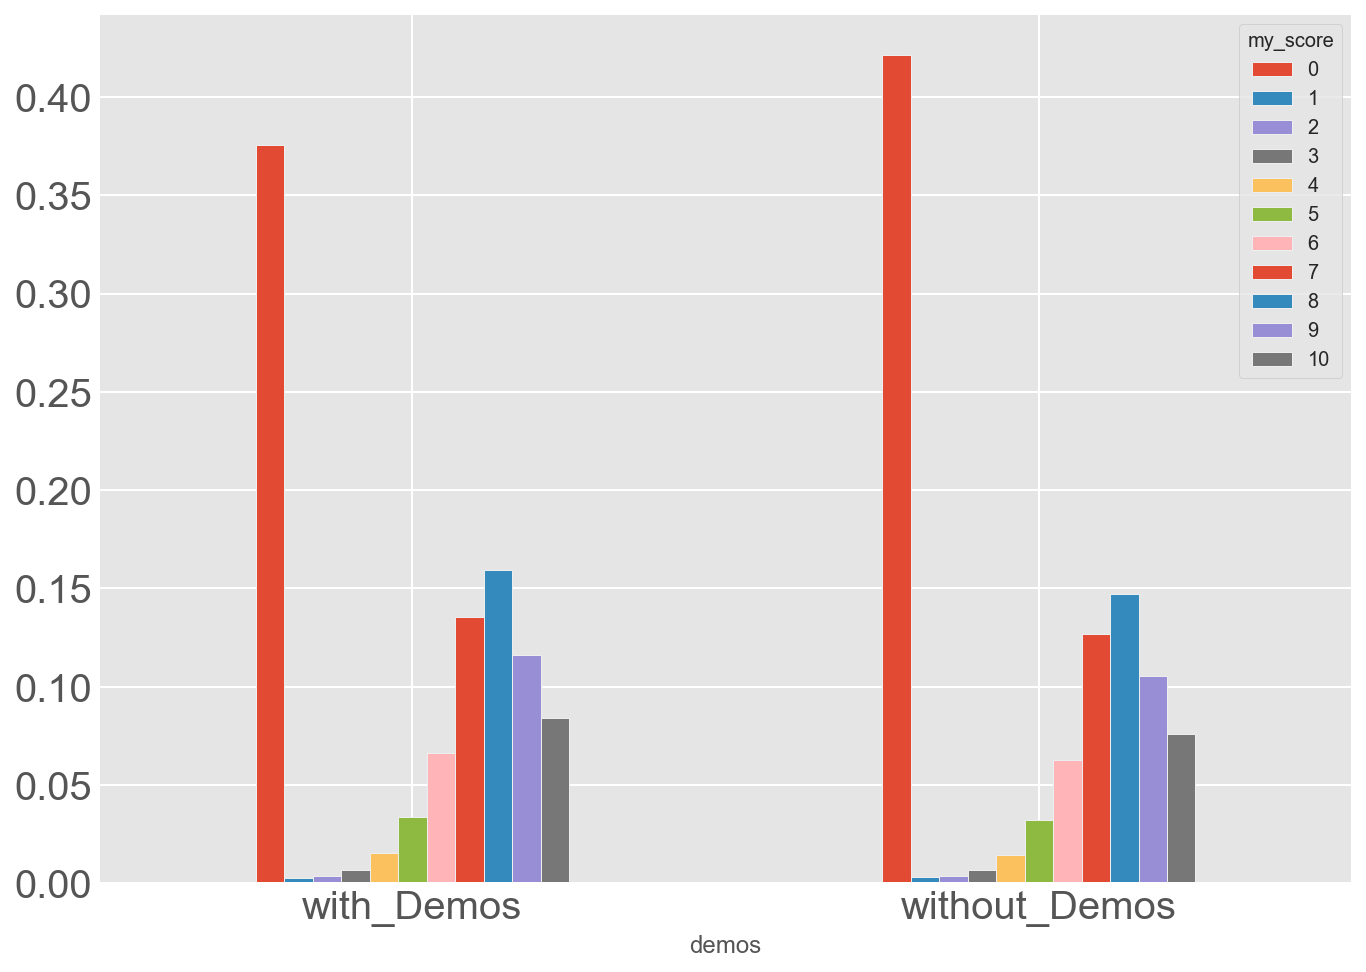

In [89]:
aa_df.plot.bar(figsize=(10,8),fontsize=20,rot=0)

In [89]:
aa_df

my_score,0,1,2,3,4,5,6,7,8,9,10
demos,,,,,,,,,,,
with_Demos,0.375415,0.002974,0.003943,0.006974,0.015226,0.033662,0.066512,0.135430,0.159530,0.116050,0.084284
without_Demos,0.421259,0.003160,0.003882,0.006715,0.014623,0.032348,0.062851,0.126716,0.147062,0.105278,0.076106


In [90]:
aa0_df=pd.crosstab(index=user_score_eng_no0["demos"],columns= user_score_eng_no0["my_score"],normalize='index')


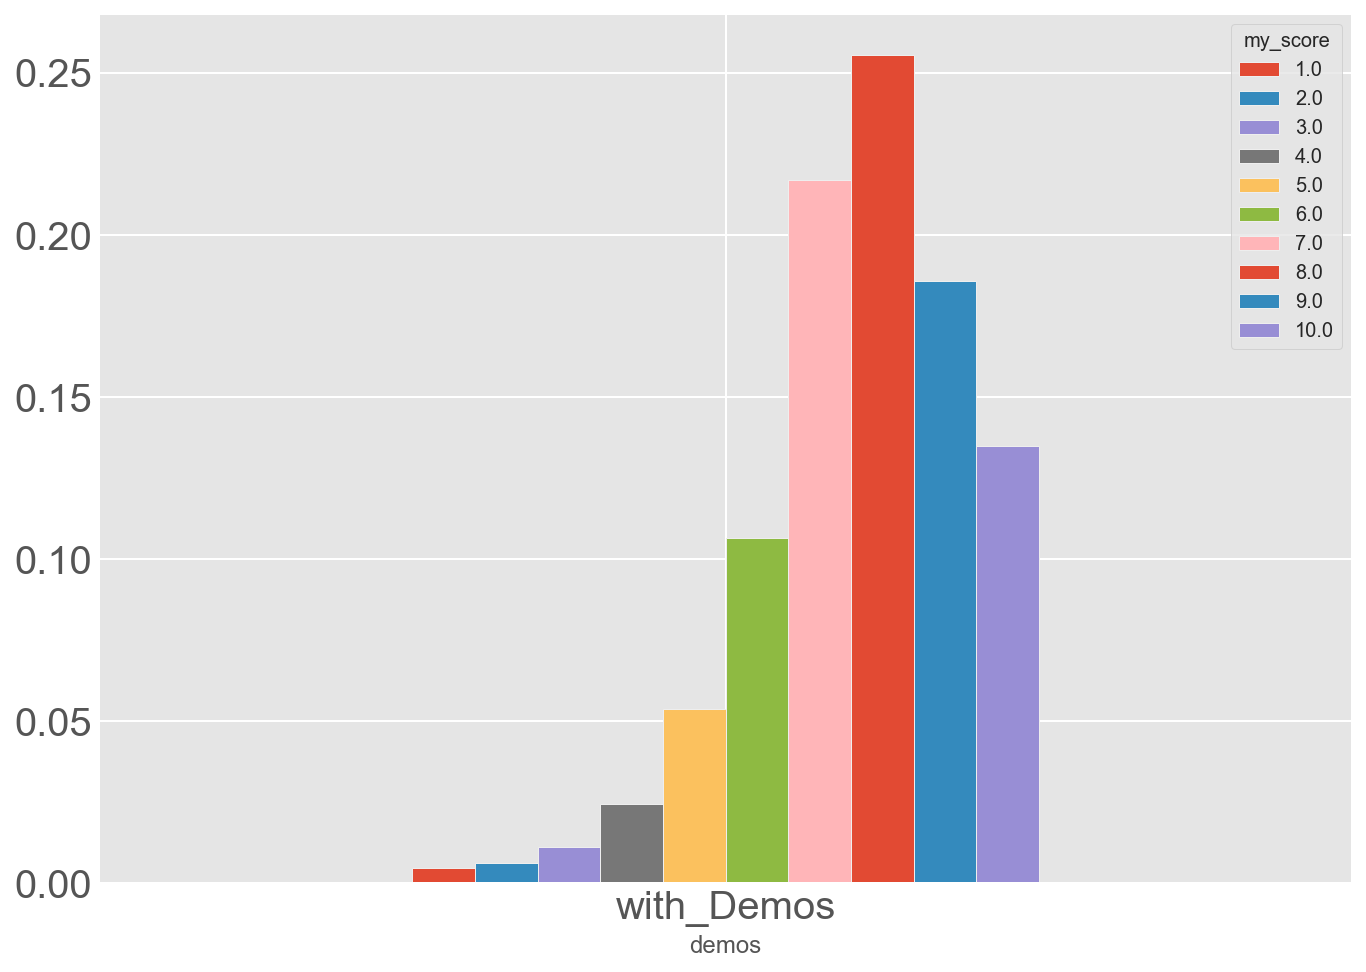

In [91]:
aa0_df.plot.bar(figsize=(10,8),fontsize=20,rot=0)

In [92]:
user_score_eng_no0.my_score.notnull().sum()

16562924

In [93]:
user_score_eng_no0.shape

(16562924, 5)

###score distribution for different watch status

my_status in animelists tables contains integer values. This is their semantics:

1. watching
2. completed
3. on hold
4. dropped
5. NaN
6. plan to watch

### Finished  vs. Unfinished-watching Ratings Distribution

In [95]:
#cleaning data a little bit

# Function to convert all strings to lower case and strip names of spaces
def clean_status(x):
    if x==33:
        return 3
    else:
        if x==55:
            return 5
        else:
            return x
# list apply the clean_status function
user_score_eng_no0['my_status_clean'] = user_score_eng_no0['my_status'].apply(clean_status)

#anime_list_eng_cleaned['my_status_clean'] = anime_list_eng_cleaned['my_status'].apply(clean_status)


In [96]:
user_score_eng_no0=user_score_eng_no0.loc[(user_demos_score_eng.my_status_clean != 5),:]



In [97]:
user_score_eng_no0=user_score_eng_no0.loc[(user_demos_score_eng.my_status_clean != 0),:]

In [98]:
user_score_eng_no0.shape

(16562857, 6)

# Decoding finish status 

In [99]:
cleanup_nums = {"my_status_clean":     {1: 'Watching', 2: 'Completed',3:'On-hold',4:'Dropped',6:'Plan to watch'}
}

In [100]:
user_score_eng_no0.replace(cleanup_nums, inplace=True)
user_score_eng_no0.head()

,username,anime_id,my_score,my_status,demos,my_status_clean
0,karthiga,21,9.0,1,with_Demos,Watching
1,karthiga,59,7.0,2,with_Demos,Completed
2,karthiga,74,7.0,2,with_Demos,Completed
3,karthiga,120,7.0,2,with_Demos,Completed
4,karthiga,178,7.0,2,with_Demos,Completed


In [101]:


status_tab_2 = pd.crosstab(index = user_score_eng_no0["my_status_clean"],  # Make a crosstab
                              columns="count",normalize=True)      # Name the count column




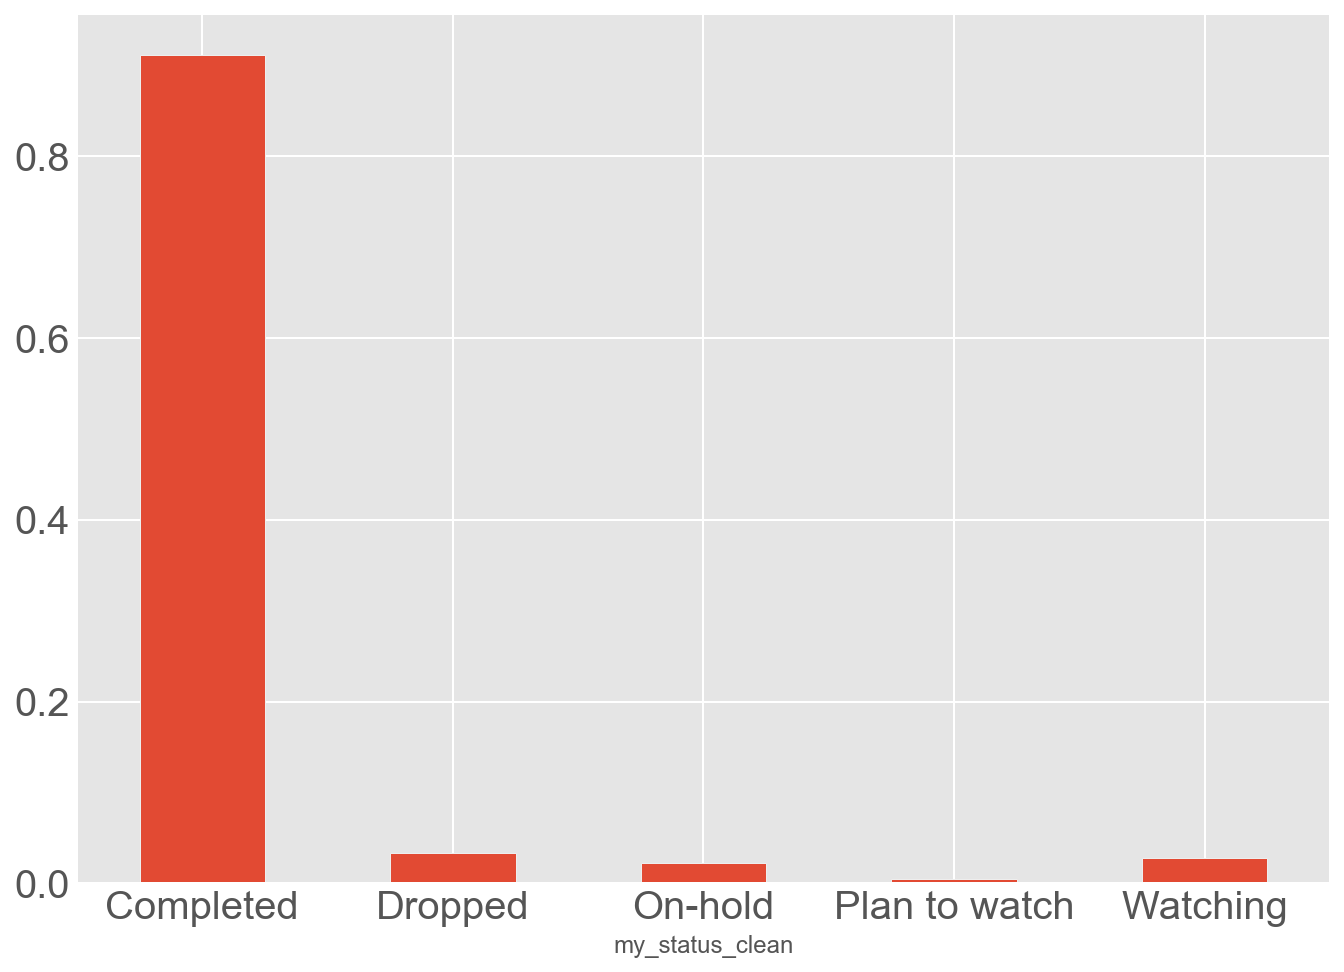

In [102]:
status_tab_2.plot.bar(figsize=(10,8),fontsize=20,legend=False,rot=0)


In [107]:
user_score_eng_no0.anime_id.nunique()

3221

In [108]:
user_score_eng_no0.username.nunique()

112948

In [123]:
user_score_eng_no0.shape

(16562857, 6)

In [106]:
user_score_eng_no0.dropna(subset=['username'],inplace=True)

In [109]:
user_rating_count=user_score_eng_no0['username'].value_counts()

In [122]:
user_rating_count.shape

(112948,)

In [111]:
bins=[0,5,10,15,20,25,30,35,40,45,50,75,100,150,200,300,400,500,600,700,800,900,1000,1500,
      #1500,2000,2500,
      #600,700,800,900,1000,
#      1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500,2600,2700,2800,2900,
      2990]

In [38]:
finish_df=pd.crosstab(index=anime_list["finish_status"],columns= anime_list["my_score"],normalize='index')

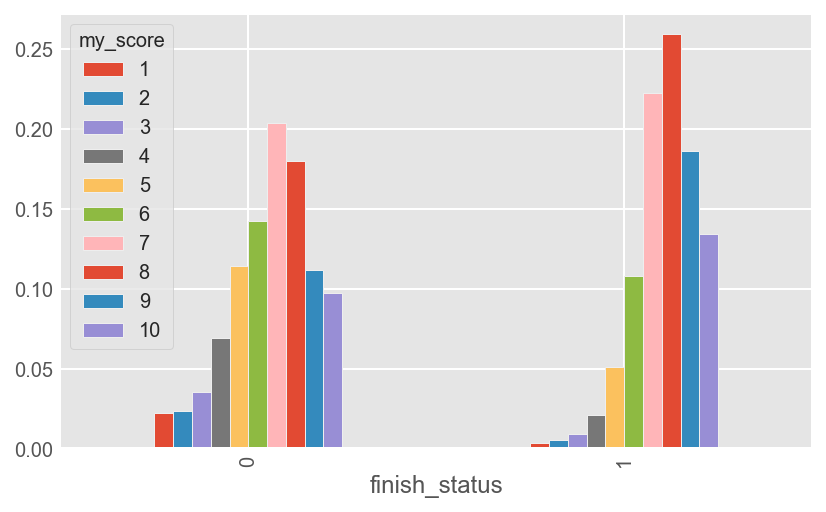

In [39]:
finish_df.plot.bar()

In [34]:
print (pd.crosstab(anime_list["finish_status"], anime_list["my_score"],normalize='index'))

my_score             1         2         3         4         5         6   \
finish_status                                                               
0              0.022465  0.023149  0.035118  0.069254  0.114315  0.142502   
1              0.003713  0.005200  0.009350  0.020770  0.050996  0.107948   

my_score             7         8         9         10  
finish_status                                          
0              0.203993  0.179710  0.111944  0.097550  
1              0.222528  0.259241  0.186225  0.134028  


### average numbers of ratings per users

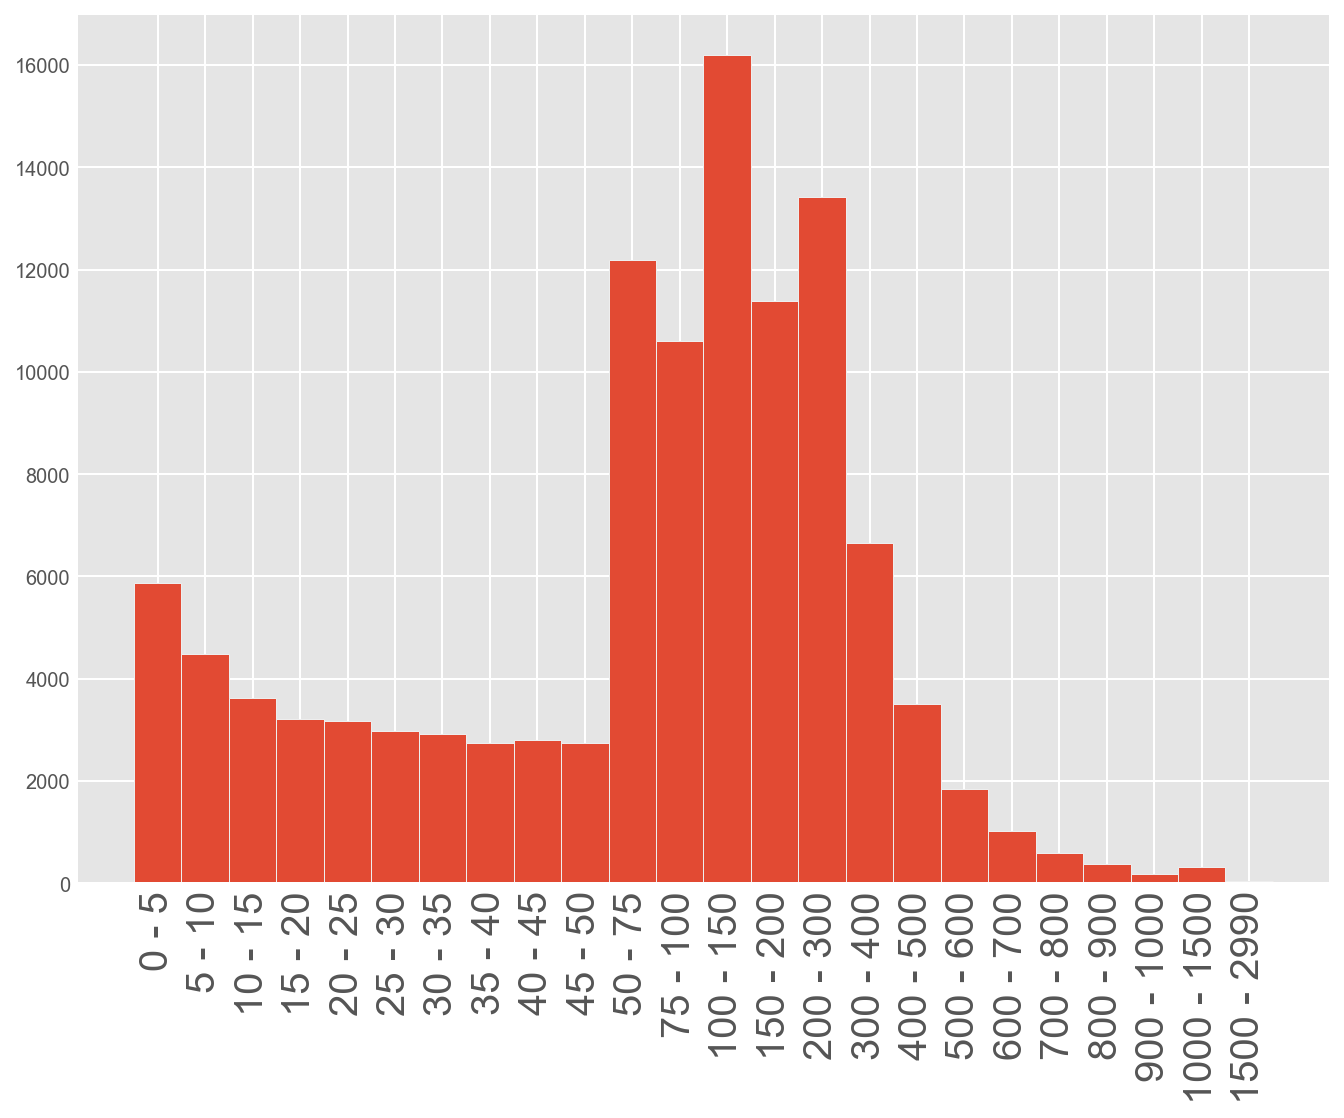

In [112]:
hist, bin_edges = np.histogram(user_rating_count,bins) # make the histogram

fig,ax = plt.subplots(figsize=(10, 8))

# Plot the histogram heights against integers on the x axis
ax.bar(range(len(hist)),hist,width=1) 

# Set the ticks to the middle of the bars
ax.set_xticks([i for i,j in enumerate(hist)])

# Set the xticklabels to a string that tells us what the bin edges were
ax.set_xticklabels(['{} - {}'.format(bins[i],bins[i+1]) for i,j in enumerate(hist)], fontsize = 20)
plt.xticks(rotation=90)

plt.show()

In [113]:
hist

array([ 5880,  4491,  3620,  3220,  3183,  2987,  2929,  2747,  2795,
        2747, 12179, 10596, 16197, 11390, 13420,  6649,  3502,  1850,
        1028,   600,   384,   192,   312,    50])

### Ratings distribution

In [115]:
p = user_score_eng_no0.groupby('my_score')['my_score'].agg(['count'])

In [116]:
left, width = .25, .5
bottom, height = .25, .5
right = left + width
top = bottom + height

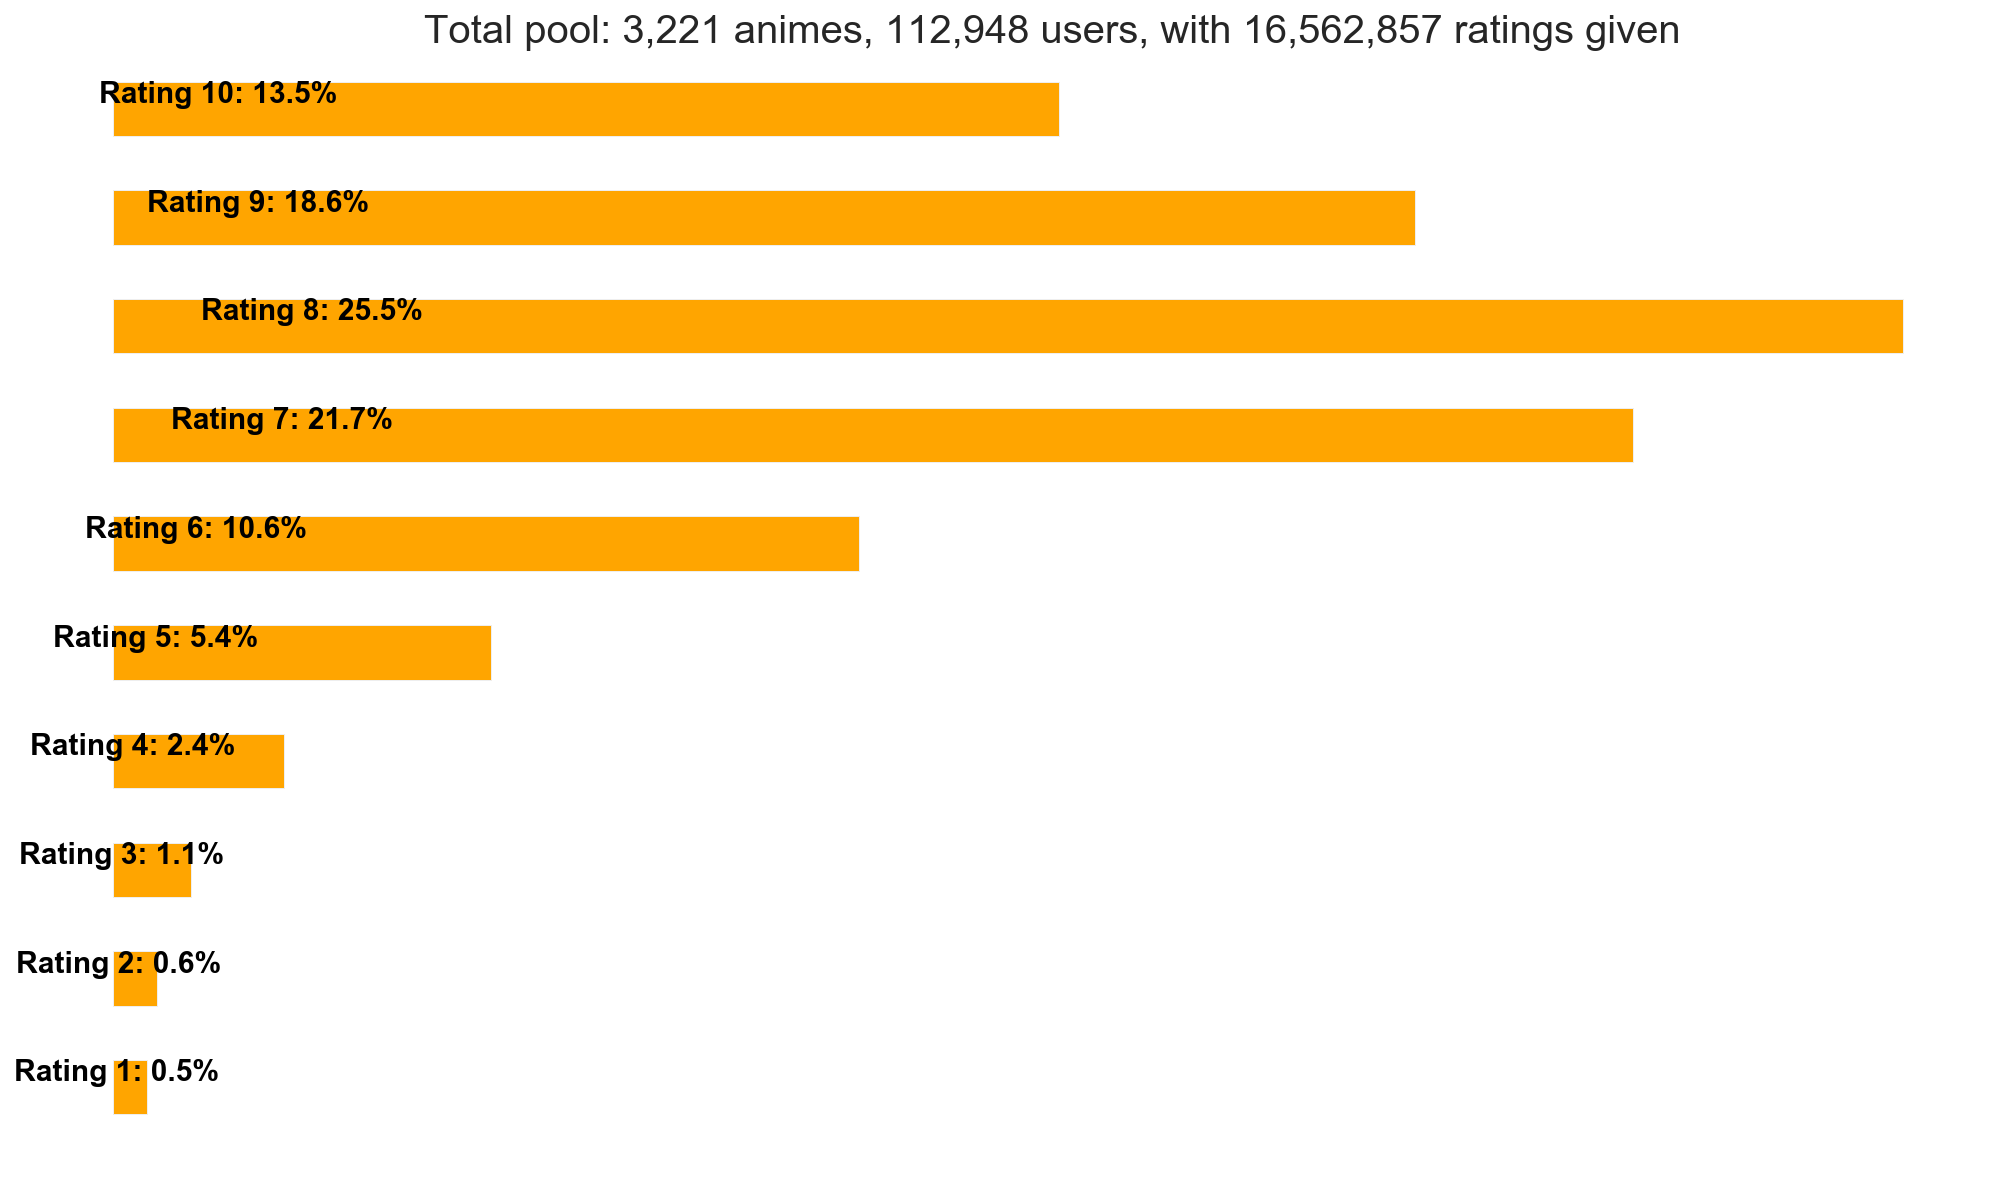

In [118]:

# get movie count
anime_count = user_score_eng_no0['anime_id'].nunique()

# get customer count
reviewed_user_count = user_score_eng_no0['username'].nunique() 

# get rating count
rating_count = user_score_eng_no0['username'].count()

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10),color='orange')
plt.title('Total pool: {:,} animes, {:,} users, with {:,} ratings given'.format(anime_count, reviewed_user_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,11):
    ax.text(p.iloc[i-1][0]/9, i-1, 'Rating {}: {:.1f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]),
       # 0.5, 0.5,
          #  'middle'
        horizontalalignment='center',
        verticalalignment='bottom',
        #transform=ax.transAxes,
            color = 'black',
            weight = 'bold',
            fontsize=15
           )


# Unique animeID and  username combinations

In [56]:
user_score=anime_list.drop(columns=[ 'my_watched_episodes', 'my_start_date',
       'my_finish_date','my_rewatching',
       'my_rewatching_ep', 'my_last_updated', 'my_tags'])

In [71]:
user_score.to_csv("user_score.csv")

In [58]:
user_score.describe()

,anime_id,my_score,my_status,my_status_clean,finish_status,eng
count,1.917195e+07,1.917195e+07,1.917195e+07,1.917195e+07,1.917195e+07,19171950.0
mean,1.127331e+04,7.591404e+00,2.081085e+00,2.081083e+00,9.110685e-01,0.0
std,1.101460e+04,1.706195e+00,5.134124e-01,5.133638e-01,2.846448e-01,0.0
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.562000e+03,7.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.0
50%,7.724000e+03,8.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.0
75%,1.867700e+04,9.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,0.0
max,3.786000e+04,1.000000e+01,3.300000e+01,6.000000e+00,1.000000e+00,0.0


In [62]:
user_score_eng = user_score[user_score['anime_id'].map(lambda x: x in eng_anime_id)]

In [63]:
user_score_eng.to_csv("user_score_eng.csv")

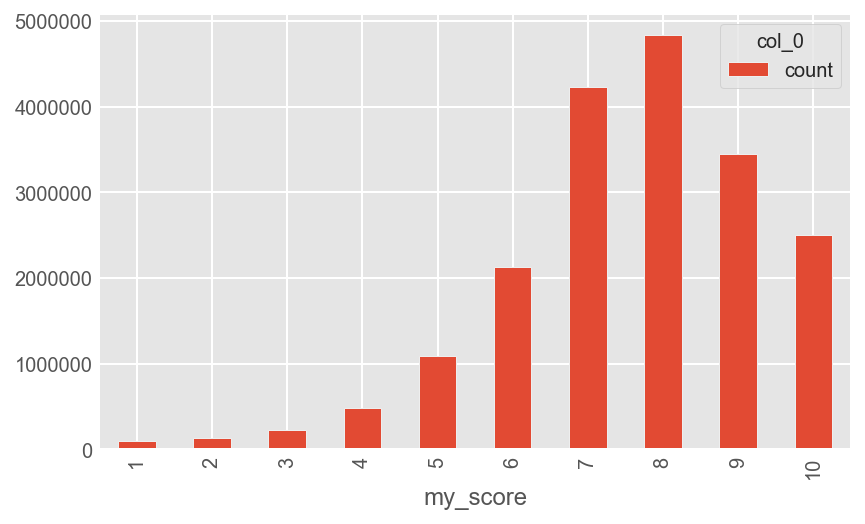

In [41]:


score_tab = pd.crosstab(index = anime_list["my_score"],  # Make a crosstab
                              columns="count")      # Name the count column

score_tab.plot.bar()



In [72]:
print (pd.crosstab(index=user_score["eng"],columns= user_score["my_score"],normalize='index'))

my_score        1         2         3         4         5         6   \
eng                                                                    
eng       0.004400  0.005979  0.010588  0.023275  0.051721  0.103495   
non-eng   0.009246  0.010021  0.015797  0.032205  0.075967  0.140692   

my_score        7         8         9         10  
eng                                               
eng       0.214630  0.257358  0.189569  0.138986  
non-eng   0.245519  0.231710  0.140391  0.098451  


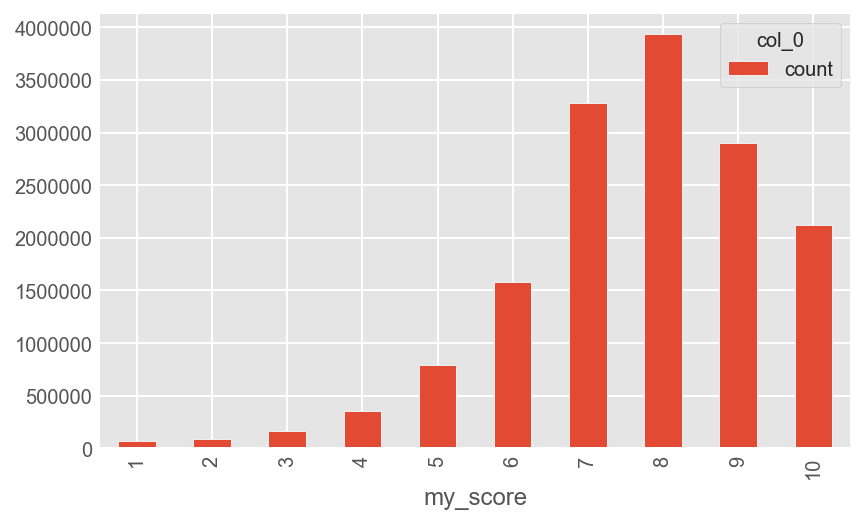

In [64]:


eng_score_tab = pd.crosstab(index = user_score_eng["my_score"],  # Make a crosstab
                              columns="count")      # Name the count column

eng_score_tab.plot.bar()



In [70]:
user_score.columns.values

array(['username', 'anime_id', 'my_score', 'my_status', 'my_status_clean',
       'finish_status', 'eng'], dtype=object)

In [79]:
user_score.shape

(19171950, 7)

In [119]:
uniq_comb=user_score_eng_no0.groupby(['anime_id','username']).size().reset_index().rename(columns={0:'count'})

In [120]:
uniq_comb['username'].value_counts()

De_Baer             2990
Dedzapadlo          2892
spacecowboy         2890
TsukasaKei          2760
VincentHarkonnen    2565
_thiagobrisolla     2373
Loomir              2367
Tsutaee             2361
misterferrari       2277
GrumpyAnimeSnob     2250
rpgothic            2230
Kannei              2079
Shouichirou         2030
MikeOne             2024
Nhoemmsi            1960
CaptainZoro         1959
SakataYusuke        1950
darthdragon         1933
Garyus              1908
edinaa              1882
nikolai131          1854
ShanaFlame          1819
redbull             1803
MistButterfly       1800
jaioni              1773
DeadlyKizuna        1770
Kairoku             1742
BerryChanx          1738
Kayro               1722
bergdoll            1711
                    ... 
Agentkommkommer        1
Guilhax                1
kamiyulovesanime       1
hiharaxhino            1
keoratiene             1
Samatsue               1
inyachi                1
sugarymoon             1
Arata9kokonoe          1


In [121]:
uniq_comb.shape

(16562857, 3)

# 
# 
# 
# 
# 
# 
# Unfinished code

In [ ]:
print (pd.crosstab(anime_list["my_status_clean"], anime_list["my_score"],normalize='index'))

In [33]:
# chose not to delete 
#anime_list=anime_list[anime_list['my_score'] !=0]

In [26]:
def status_fn(x):
    if x['my_status_clean'] == 2:
        return 'finished'
    elif x['my_status_clean'] == 0:
        return ''
    else:
        return 'unfished'
    
   

In [29]:
anime_list["finish_status"] =0

### English vs Non-english Animes Rating Distributions

In [67]:
# Function to convert all strings to lower case and strip names of spaces
def is_eng(x):
    if (x in eng_anime_id):
        return "eng"
    else:
        return "non-eng"

In [68]:
user_score["eng"] = user_score["anime_id"].apply(is_eng)


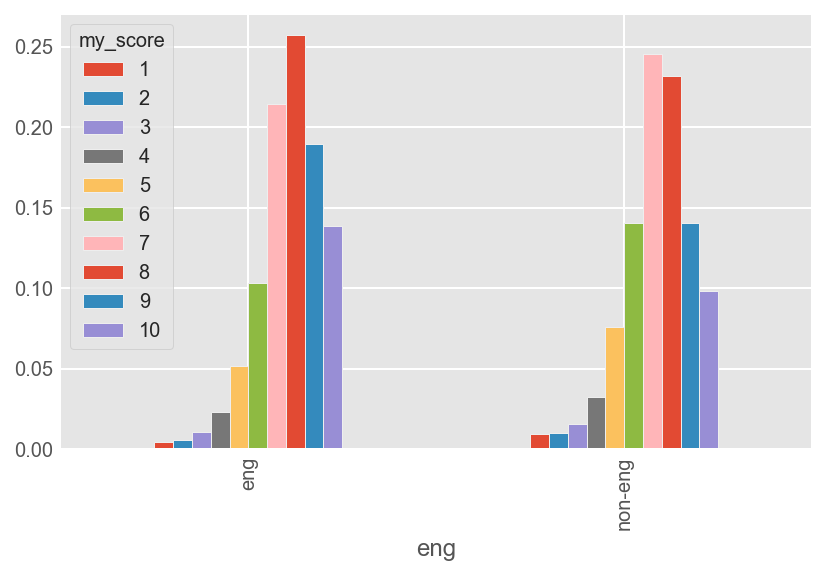

In [69]:
eng_df=pd.crosstab(index=user_score["eng"],columns= user_score["my_score"],normalize='index')
eng_df.plot.bar()

### overall ratings distribution